## Chap 2. 서울시 범죄 현황 분석

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

In [3]:
crime_anal_police=pd.read_csv('.../02. crime_in_Seoul_include_gu_name.csv',thousands=',',
                              encoding='utf-8')
crime_anal_police.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [4]:
crime_anal=pd.pivot_table(crime_anal_police,index='구별',aggfunc=np.sum)
crime_anal.head()

,Unnamed: 0,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,,
강남구,47,349,449,18,21,10,13,1650,3850,3705,4284
강동구,20,123,156,8,6,3,4,789,2366,2248,2712
강북구,14,126,153,13,14,8,7,618,1434,2348,2649
관악구,18,221,320,14,12,8,9,827,2706,2642,3298
광진구,12,220,240,26,14,4,4,1277,3026,2180,2625


In [5]:
crime_anal['강간검거율']=crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율']=crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율']=crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율']=crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율']=crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,Unnamed: 0,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,
강남구,47,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,20,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,14,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,18,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,12,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [6]:
con_list=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

for col in con_list:
    crime_anal.loc[crime_anal[col]>100,col]=100
    
crime_anal.head()

,Unnamed: 0,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,
강남구,47,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,20,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,14,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,18,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,12,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [7]:
crime_anal.rename(columns={'강간 발생':'강간','강도 발생':'강도',
                          '살인 발생':'살인','절도 발생':'절도','폭력 발생':'폭력'},
                  inplace=True)
crime_anal.head()

,Unnamed: 0,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,
강남구,47,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,20,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,14,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,18,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,12,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [8]:
from sklearn import preprocessing

col=['강간','강도','살인','절도','폭력']

x=crime_anal[col].values
min_max_scaler=preprocessing.MinMaxScaler()

x_scaled=min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm=pd.DataFrame(x_scaled,columns=col,index=crime_anal.index)

col2=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2]=crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


In [9]:
result_cctv=pd.read_csv(".../01. CCTV_result.csv",encoding='utf-8',
                        index_col='구별')
crime_anal_norm[['인구수','CCTV']]=result_cctv[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707


In [10]:
crime_anal_norm['범죄']=np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438


In [11]:
crime_anal_norm['검거']=np.sum(crime_anal_norm[col2],axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform
path="c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('unknown system')

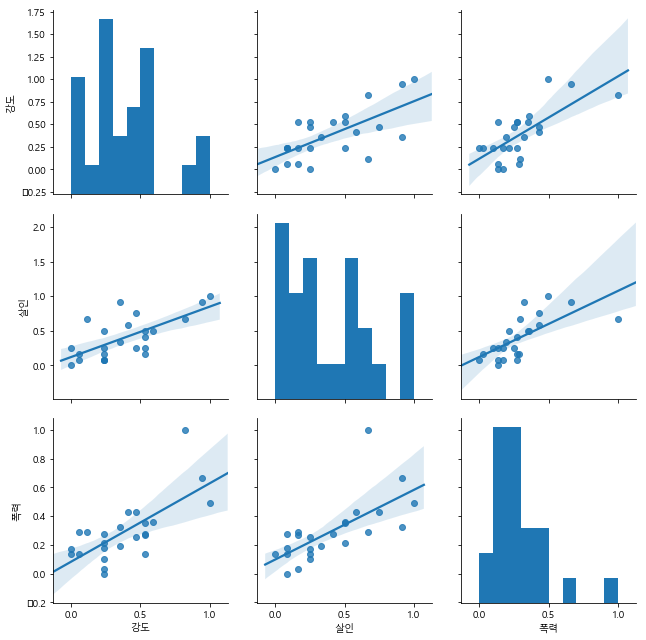

In [13]:
sns.pairplot(crime_anal_norm,vars=["강도","살인","폭력"],kind='reg',height=3)
plt.show()

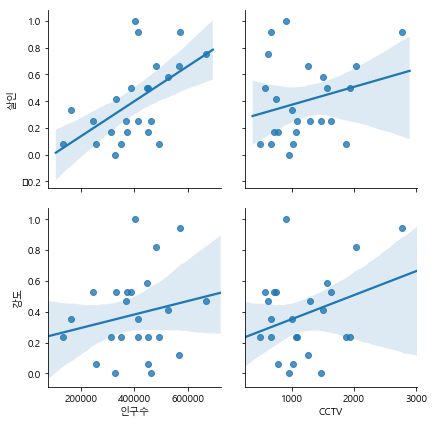

In [14]:
sns.pairplot(crime_anal_norm,x_vars=["인구수","CCTV"],y_vars=["살인","강도"],kind='reg',
            height=3)
plt.show()

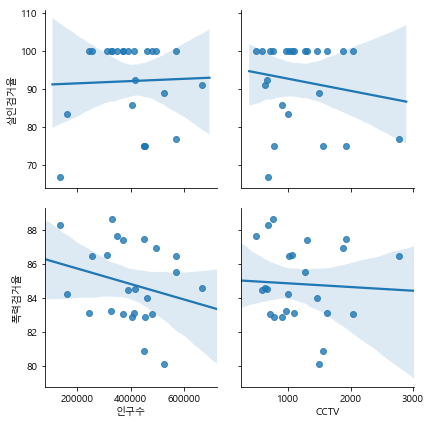

In [15]:
sns.pairplot(crime_anal_norm,x_vars=["인구수","CCTV"],y_vars=["살인검거율","폭력검거율"],
            kind='reg',height=3)
plt.show()

In [16]:
tmp_max=crime_anal_norm['검거'].max()
crime_anal_norm['검거']=crime_anal_norm['검거']/tmp_max*100
crime_anal_norm_sort=crime_anal_norm.sort_values(by='검거',ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.589867,97.997139
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.034438,96.375820
동대문구,0.204611,0.470588,0.250000,0.314061,0.250887,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.490147,95.444250
용산구,0.265130,0.529412,0.250000,0.169004,0.133128,89.175258,100.0,100.0,37.700706,83.121951,244203.0,1624,1.346674,94.776790


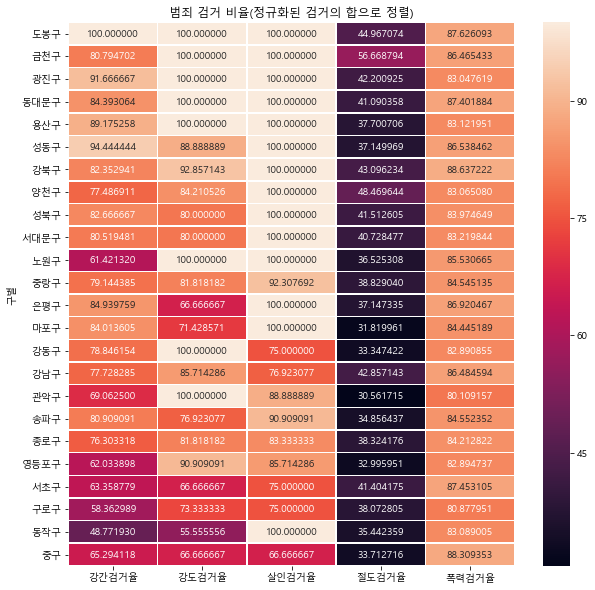

In [17]:
target_col=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm_sort=crime_anal_norm.sort_values(by='검거',ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col],annot=True,fmt='f',linewidths=.5)
plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬)')
plt.show()

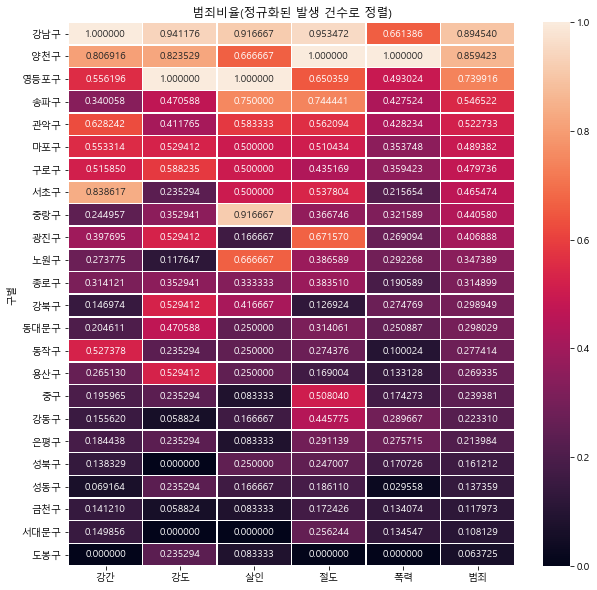

In [18]:
target_col=['강간','강도','살인','절도','폭력','범죄']
crime_anal_norm['범죄']=crime_anal_norm['범죄']/5
crime_anal_norm_sort=crime_anal_norm.sort_values(by='범죄',ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col],annot=True,fmt='f',linewidths=.5)
plt.title('범죄비율(정규화된 발생 건수로 정렬)')
plt.show()

In [19]:
crime_anal_norm.to_csv('.../02. crime_in_Seoul_final.csv',sep=',',encoding='utf-8')

In [20]:
import folium
import json
geo_path='.../02. skorea_municipalities_geo_simple.json'
geo_str=json.load(open(geo_path,encoding='utf-8'))

In [21]:
map=folium.Map(location=[37.5502,126.982],zoom_start=11,
              tiles='Stamen Toner')
folium.Choropleth(geo_data=geo_str,
               data=crime_anal_norm['살인'],
               columns=[crime_anal_norm.index, crime_anal_norm['살인']],
               fill_color='PuRd',key_on='feature.id').add_to(map)
map

In [22]:
map=folium.Map(location=[37.5502,126.982],zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(geo_data=geo_str,
              data=crime_anal_norm['강간'],
              columns=[crime_anal_norm.index,crime_anal_norm['강간']],
              fill_color='PuRd',key_on='feature.id').add_to(map)
map

In [23]:
map=folium.Map(location=[37.5502,126.982],zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(geo_data=geo_str,
              data=crime_anal_norm['범죄'],
              columns=[crime_anal_norm.index,crime_anal_norm['범죄']],
              fill_color='PuRd',key_on='feature.id').add_to(map)
map

In [24]:
tmp_criminal=crime_anal_norm['살인']/crime_anal_norm['인구수']*1000000
map=folium.Map(location=[37.5502,126.982],zoom_start=11,tiles='Stamen Toner')
folium.Choropleth(geo_data=geo_str,
                 data=tmp_criminal,
                 columns=[crime_anal_norm.index,tmp_criminal],
                 fill_color='PuRd',key_on='feature.id').add_to(map)
map